# Рекомендация тарифов

Датасет содержит данные о поведении клиентов, которые уже перешли на новые тарифы мобильного оператора эти тарифы (предобработка данных не уже была выполнена).
<br>Необходимо построить модель для задачи классификации, которая выберет подходящий тариф для клиента. 
<br>Критерий качества модели: accurascy score >= 0,75.


## 1. Подготовка

In [1]:
import pandas as pd
import seaborn as sns

# Импортируем модели классификации, которые будем использовать ниже.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Испортируем впомогательные инструменты для модели: для разбивки на выборки и оценки качества модели
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Для созранения модели с наилучшими параметрами, выбранной при обучении и ее извлечения для оценки на тестовой выборке.
import joblib

In [2]:
df = pd.read_csv('datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Датасет содержат 3 214 строк, пропущенных значений не имеет.
<br>Формат данных - числовой, подходит для поставленных целей анализа.

## 2. Формирование выборок

In [5]:
# Выделим из датасета столбцы с признаками и столбец с целевым признаком.

features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [6]:
# Выделим из исходных данных тестовую выборку в 10%.
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, test_size=0.1, random_state=12345, stratify=target)


# Разделим оставшиеся данные на обучающую и валидационную выборки. Валидационная выборка составит 25% исходных данных.
(features_train,
 features_valid,
 target_train,
 target_valid) = train_test_split(features_train, target_train, test_size=0.2, random_state=12345)


# Проверим корерктность рассплитовки.
if features_train.shape[0]+features_valid.shape[0]+features_test.shape[0] == df.shape[0]:
    print('Датасет раздлен на выборки корректно\n')
else:
    print('Датасет раздлен на выборки некорректно\n')

print('Исходный датасет включает:', df.shape[0],
      '\nОбучающая выборка включает:', features_train.shape[0], f'или {features_train.shape[0]/df.shape[0]:.0%} датасета'
      '\nВалидационная выборка включает:', features_valid.shape[0], f'или {features_valid.shape[0]/df.shape[0]:.0%} датасета'
      '\nТестовая выборка включает:', features_test.shape[0], f'или {features_test.shape[0]/df.shape[0]:.0%} датасета')


Датасет раздлен на выборки корректно

Исходный датасет включает: 3214 
Обучающая выборка включает: 2313 или 72% датасета
Валидационная выборка включает: 579 или 18% датасета
Тестовая выборка включает: 322 или 10% датасета


In [7]:
# Проверка работы стратификации.

print('Исходный датасет:\n', (target.value_counts()/target.shape[0]).round(2))
print('Обучающая выборка:\n', (target_train.value_counts()/target_train.shape[0]).round(2))
print('Валидационная выборка:\n', (target_valid.value_counts()/target_valid.shape[0]).round(2))
print('Тестовая выборка:\n', (target_test.value_counts()/target_test.shape[0]).round(2))

Исходный датасет:
 0    0.69
1    0.31
Name: is_ultra, dtype: float64
Обучающая выборка:
 0    0.69
1    0.31
Name: is_ultra, dtype: float64
Валидационная выборка:
 0    0.69
1    0.31
Name: is_ultra, dtype: float64
Тестовая выборка:
 0    0.69
1    0.31
Name: is_ultra, dtype: float64


## 3. Построение моделей

### 3.1. Дерево решений

In [8]:
DT_param = []
DT_accur = []

dt_best_model = None
dt_best_result = 0
best_depth = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    print('Accuracy модели с глубиной', depth, 'составляет:', result.round(3))
    
    DT_param.append(depth)
    DT_accur.append(result.round(3))
    
    if result > dt_best_result:
        dt_best_model = model
        best_depth = depth
        dt_best_result = result

print('\nAccuracy лучшей модели:', dt_best_result.round(3),
      '\nЕе глубина:', best_depth)

# Запись лучшей модели
joblib.dump(dt_best_model, 'dt_model.joblib')

Accuracy модели с глубиной 1 составляет: 0.758
Accuracy модели с глубиной 2 составляет: 0.781
Accuracy модели с глубиной 3 составляет: 0.794
Accuracy модели с глубиной 4 составляет: 0.786
Accuracy модели с глубиной 5 составляет: 0.8
Accuracy модели с глубиной 6 составляет: 0.8
Accuracy модели с глубиной 7 составляет: 0.815
Accuracy модели с глубиной 8 составляет: 0.81
Accuracy модели с глубиной 9 составляет: 0.803
Accuracy модели с глубиной 10 составляет: 0.8
Accuracy модели с глубиной 11 составляет: 0.791
Accuracy модели с глубиной 12 составляет: 0.789
Accuracy модели с глубиной 13 составляет: 0.77
Accuracy модели с глубиной 14 составляет: 0.748
Accuracy модели с глубиной 15 составляет: 0.741
Accuracy модели с глубиной 16 составляет: 0.741
Accuracy модели с глубиной 17 составляет: 0.751
Accuracy модели с глубиной 18 составляет: 0.739
Accuracy модели с глубиной 19 составляет: 0.748

Accuracy лучшей модели: 0.815 
Ее глубина: 7


['dt_model.joblib']

<AxesSubplot:xlabel='DT_depth', ylabel='DT_accuracy'>

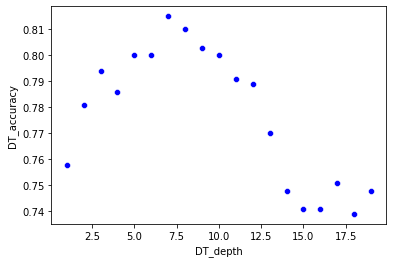

In [9]:
DT_data = pd.DataFrame({'DT_depth': DT_param,
                       'DT_accuracy': DT_accur})

sns.scatterplot(data=DT_data,
               x='DT_depth',
               y='DT_accuracy',
               color='blue'
               )

### 3.2. Случайный лес

In [10]:
RF_param = []
RF_accur = []

rf_best_model = None
rf_best_result = 0
est = 0

for est in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    print('Accuracy модели с числом эстиматоров', est, 'составляет:', result.round(3))
    
    RF_param.append(est)
    RF_accur.append(result.round(3))
    
    if result > rf_best_result:
        rf_best_model = model
        best_est = est
        rf_best_result = result

print('Accuracy лучшей модели:', rf_best_result.round(3),
      '\nЧисло ее деревьев:', best_est)

# Запись лучшей модели
joblib.dump(rf_best_model, 'rf_model.joblib')

Accuracy модели с числом эстиматоров 1 составляет: 0.731
Accuracy модели с числом эстиматоров 2 составляет: 0.784
Accuracy модели с числом эстиматоров 3 составляет: 0.765
Accuracy модели с числом эстиматоров 4 составляет: 0.784
Accuracy модели с числом эстиматоров 5 составляет: 0.772
Accuracy модели с числом эстиматоров 6 составляет: 0.786
Accuracy модели с числом эстиматоров 7 составляет: 0.781
Accuracy модели с числом эстиматоров 8 составляет: 0.782
Accuracy модели с числом эстиматоров 9 составляет: 0.777
Accuracy модели с числом эстиматоров 10 составляет: 0.798
Accuracy модели с числом эстиматоров 11 составляет: 0.782
Accuracy модели с числом эстиматоров 12 составляет: 0.796
Accuracy модели с числом эстиматоров 13 составляет: 0.793
Accuracy модели с числом эстиматоров 14 составляет: 0.796
Accuracy модели с числом эстиматоров 15 составляет: 0.794
Accuracy модели с числом эстиматоров 16 составляет: 0.801
Accuracy модели с числом эстиматоров 17 составляет: 0.805
Accuracy модели с число

['rf_model.joblib']

<AxesSubplot:xlabel='RF_depth', ylabel='RF_accuracy'>

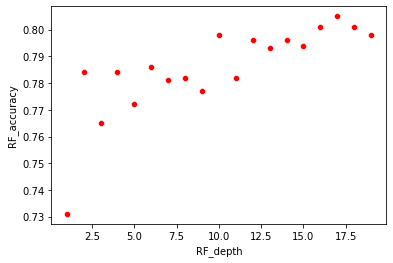

In [11]:
RF_data = pd.DataFrame({'RF_depth': RF_param,
                       'RF_accuracy': RF_accur})

sns.scatterplot(data=RF_data,
               x='RF_depth',
               y='RF_accuracy',
               color='red'
               )

### 3.3. Логистическая регрессия

In [12]:
LR_param = []
LR_accur = []


lr_best_model = None
lr_best_result = 0
best_itr = 0

for itr in range(1, 10):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=itr, penalty='l2')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    
    LR_param.append(itr)
    LR_accur.append(result.round(3))
    
    if result > lr_best_result:
        lr_best_model = model
        best_itr = itr
        lr_best_result = result


print('Accuracy лучшей модели:', lr_best_result.round(3),
     '\nРезультат получен за итераций:', best_itr)

# Запись лучшей модели
joblib.dump(lr_best_model, 'lr_model.joblib')

Accuracy лучшей модели: 0.694 
Результат получен за итераций: 1


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

['lr_model.joblib']

<AxesSubplot:xlabel='LR_param', ylabel='LR_accuracy'>

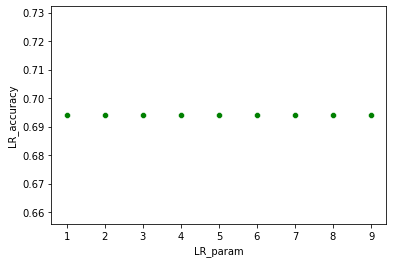

In [13]:
LR_data = pd.DataFrame({'LR_param': LR_param,
                       'LR_accuracy': LR_accur})

sns.scatterplot(data=LR_data,
               x='LR_param',
               y='LR_accuracy',
               color='green')

In [14]:
# Сравним  трех моделей, полученные на валидационной выборке.

print('Дерево решений' , dt_best_result.round(3))
print('Случайный лес' , rf_best_result.round(3))
print('Логистическая регрессия' , lr_best_result.round(3))

Дерево решений 0.815
Случайный лес 0.805
Логистическая регрессия 0.694


Таким образом, наилучшие результаты accuracy score дал случайный лес, наихудшие - логистическая регрессия.

## 4. Проверка модели на тестовой выборке

In [15]:
rf_result_test = joblib.load('rf_model.joblib').predict(features_test)
print('Accuracy случайного леса составляет', accuracy_score(rf_result_test, target_test).round(3))

Accuracy случайного леса составляет 0.804


Таким образом, наилучшие результаты на тестовой выборке продемонстрировала модель дерева решений. Наихудший - логистическая регрессия.
<br>При выборе модели для предсказания на фактических данных следует выбирать либо дерево рещений, либо случайный лес.

## 5. Проверка модели на адекватность

In [16]:
import numpy as np

df_dummy = df

df_dummy['is_ultra_dummy'] = np.random.choice([1, 0], size=df_dummy.shape[0], p=[.3,.7])
df_dummy = df_dummy.drop('is_ultra', axis=1)


features_dummy = df_dummy.drop(['is_ultra_dummy'], axis=1)
target_dummy = df_dummy['is_ultra_dummy']

# Проверим, что значения действительно отличаются от исходного датасета.
print(target.value_counts())
print(target_dummy.value_counts())

dt_result_dummy = joblib.load('dt_model.joblib').predict(features_dummy)
rf_result_dummy = joblib.load('rf_model.joblib').predict(features_dummy)
lr_result_dummy = joblib.load('lr_model.joblib').predict(features_dummy)

print('Accuracy дерева решений составляет', accuracy_score(dt_result_dummy, target_dummy).round(3))
print('Accuracy случайного леса составляет', accuracy_score(rf_result_dummy, target_dummy).round(3))
print('Accuracy логистической регрессии составляет', accuracy_score(lr_result_dummy, target_dummy).round(3))

0    2229
1     985
Name: is_ultra, dtype: int64
0    2256
1     958
Name: is_ultra_dummy, dtype: int64
Accuracy дерева решений составляет 0.631
Accuracy случайного леса составляет 0.585
Accuracy логистической регрессии составляет 0.702
